
# 因子实战 第二集 如何根据历史数据预测股价...?
## 从调包侠到因子学徒...?


---

##### “历史是一面镜子，你可以从中看到未来” - 埃德蒙·伯克
##### "编程是一门艺术，而不是科学" - Donald Knuth
##### "数据科学是一门艺术，而不是科学" - 大导演哈罗德



### [@大导演哈罗德](mailto:zhongfangyuan@link.cuhk.edu.cn)
### 香港中文大学(深圳) 
### 金融工程 
### 大四
### [Bilibili](https://space.bilibili.com/629573485)

---

## 注意：本篇内容适合具有一定的机器学习基础的同学学习

---

## 作为一个人工智能互联网时代，知识的获取已经变得非常容易，但是知识的应用却是一个非常难的事情，因为知识的应用需要大量的实践。
## 本篇内容将会带领大家从零开始，一步一步的完成一个因子的构建，希望大家能够在这个过程中学到一些东西。

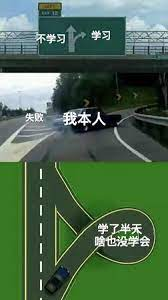



## 先当一个 调包侠，再当一个 调包侠，最后当一个... 调包侠。

#### enough is enough


In [1]:
import pandas as pd
import numpy as np

from datetime import datetime,timedelta

import os
import re


from sklearn.model_selection import train_test_split 
from sklearn.model_selection import TimeSeriesSplit 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import ParameterSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from sklearn.datasets import load_iris
from sklearn.datasets import load_digits
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_hastie_10_2

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import FastICA

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN

from sklearn.manifold import TSNE
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import MDS

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt

## 读取市场的宏观数据

原因：市场的宏观数据，是影响股票的重要因素，所以需要读取市场的宏观数据。并且中国市场的宏观数据由于政策的影响，以及文化属性，有很多的特殊性，所以需要对市场的宏观数据进行分析。很多时候宏观因子对股票的整体影响，远远大于股票的个体因子。

另外值得注意的是，市场的宏观数据，是影响股票的重要因素，但是市场的宏观数据，也是受到股票的影响的。所以市场的宏观数据，和股票的个体因子，是相互影响的。并且市场的宏观数据，和股票的个体因子，是相互影响的，这个影响是双向的。所以市场的宏观数据，和股票的个体因子，是相互影响的，这个影响是双向的，这个影响是双向的，这个影响是双向的，重要的事情说三遍。


In [2]:
df_new_data = pd.read_excel('宏观数据.xlsx')
df_new_data = df_new_data.drop(df_new_data.index[0:2])

In [3]:
df_new_data

,Markettype,Trddt,Cnshrtrdtl,Cnvaltrdtl,Cdretwdos,Cdretwdtl
2,10,2016-01-04,219861208,1719124913.235,-0.067154,-0.070322
3,5,2016-01-04,35359616988,506190245311.450012,-0.075776,-0.078233
4,15,2016-01-04,35579478196,507909370224.684998,-0.075727,-0.07819
5,21,2016-01-04,38707509260,594496820672.849976,-0.077121,-0.079632
6,31,2016-01-04,38927370468,596215945586.084961,-0.077069,-0.079587
...,...,...,...,...,...,...
32354,95,2022-12-30,53272152131,571500790263.628052,0.004926,0.004862
32355,101,2022-12-30,47074107858,496349980099.909973,0.004985,0.004672
32356,111,2022-12-30,47100530364,496524962859.807983,0.004991,0.004677
32357,117,2022-12-30,54032669625,604351905169.72998,0.004567,0.004254


In [5]:
df_new_data_type_5 = df_new_data[df_new_data['Markettype']== 5]
df_new_data_type_5

,Markettype,Trddt,Cnshrtrdtl,Cnvaltrdtl,Cdretwdos,Cdretwdtl
3,5,2016-01-04,35359616988,506190245311.450012,-0.075776,-0.078233
22,5,2016-01-05,50931128000,686742769972.290039,-0.005631,-0.007548
41,5,2016-01-06,45043572481,593112739663.609985,0.024575,0.025262
60,5,2016-01-07,13093833239,161366307570.399994,-0.077082,-0.079387
79,5,2016-01-08,52397745953,650626283059.459961,0.018498,0.018556
...,...,...,...,...,...,...
32265,5,2022-12-26,44332903822,464282479737.669983,0.005756,0.006421
32284,5,2022-12-27,48188438810,496247670716.549988,0.010076,0.010006
32303,5,2022-12-28,49040844431,495242544530.299988,-0.004204,-0.004264
32322,5,2022-12-29,46082041269,467272635996.340027,-0.005292,-0.005345


In [6]:
df_x = pd.read_csv('X.csv')
df_x

,ILLIQ,PE,PB,PS,CirculatedMarketValue,ChangeRatio,Liquidility
0,0.036759,15.009085,3.611316,1.429006,3.516692e+10,-0.05194,0.000368
1,0.007588,15.241784,3.667306,1.451161,3.571215e+10,0.01550,0.000222
2,0.008464,15.420187,3.710231,1.468146,3.613015e+10,0.01170,0.000176
3,0.077782,14.807413,3.562792,1.409805,3.469440e+10,-0.03974,0.000326
4,0.017571,15.358134,3.695300,1.462238,3.598476e+10,0.03719,0.000296
...,...,...,...,...,...,...,...
10153,0.004110,55.252364,15.684150,14.740629,3.685751e+11,-0.01278,0.000034
10154,0.000595,55.349615,15.711756,14.766574,3.692239e+11,0.00176,0.000032
10155,0.001925,55.787244,15.835983,14.883328,3.721432e+11,0.00791,0.000032
10156,0.005380,54.759163,15.544148,14.609049,3.652851e+11,-0.01843,0.000033


In [7]:
df_y = pd.read_csv('y.csv')
df_y

,Dretwd
0,0.015504
1,0.011705
2,-0.039738
3,0.037192
4,-0.054545
...,...
10153,0.001760
10154,0.007907
10155,-0.018429
10156,0.009768


## 加上宏观因子之后

### // 步骤:
#### // 1. 读取市场的宏观数据
#### // 2. 根据日期merge到因子数据中
#### // （课后大家可以尝试一下，这里的考验的地方是对于merge的掌握，而且很多时候日常数据很容易出现二次读取，要有耐心，要细心，注意对齐。）
#### 提示 

```python 
df_merge = pd.merge(df, df_new_data, on='Trddt', how='left')
```






In [8]:
df = pd.read_csv('X_new.csv')
df

,ILLIQ,PE,PB,PS,CirculatedMarketValue,ChangeRatio,Liquidility,Cnshrtrdtl,Cnvaltrdtl,Cdretwdos,Cdretwdtl
0,0.036759,15.009085,3.611316,1.429006,3.516692e+10,-0.05194,0.000368,35359616988,5.061902e+11,-0.075776,-0.078233
1,0.055729,43.656088,3.469911,0.942676,1.816864e+10,-0.06784,0.000557,35359616988,5.061902e+11,-0.075776,-0.078233
2,0.006737,19.863375,4.566832,1.524241,9.028737e+10,-0.07669,0.000067,35359616988,5.061902e+11,-0.075776,-0.078233
3,0.080227,35.693173,10.236025,7.931090,8.919126e+09,-0.06365,0.000802,35359616988,5.061902e+11,-0.075776,-0.078233
4,0.125964,69.653140,2.738554,3.683969,3.791777e+09,-0.09976,0.001260,35359616988,5.061902e+11,-0.075776,-0.078233
...,...,...,...,...,...,...,...,...,...,...,...
10153,0.008239,25.043464,1.432990,0.507915,1.397414e+10,0.01318,0.000081,46236663464,4.628602e+11,0.005406,0.005414
10154,0.000489,22.789390,4.065906,1.793746,1.955477e+11,0.00421,0.000010,46236663464,4.628602e+11,0.005406,0.005414
10155,0.000952,58.904228,10.348619,15.122810,2.679756e+10,-0.00160,0.000053,46236663464,4.628602e+11,0.005406,0.005414
10156,0.012492,49.182439,2.992144,3.040436,6.445227e+09,0.04126,0.000109,46236663464,4.628602e+11,0.005406,0.005414


In [9]:
X = df[['ILLIQ', 'PE', 'PB', 'PS', 'CirculatedMarketValue', 'ChangeRatio', 'Liquidility','Cnshrtrdtl', 'Cnvaltrdtl', 'Cdretwdos', "Cdretwdtl"]]

In [10]:
df = pd.read_csv('y_new.csv')
y = df['Dretwd']

In [11]:
y_shift_one = y.shift(-1)

In [12]:
y_shift_one.fillna(method='ffill', inplace=True)

## 再看看因子的数据

In [13]:
X

,ILLIQ,PE,PB,PS,CirculatedMarketValue,ChangeRatio,Liquidility,Cnshrtrdtl,Cnvaltrdtl,Cdretwdos,Cdretwdtl
0,0.036759,15.009085,3.611316,1.429006,3.516692e+10,-0.05194,0.000368,35359616988,5.061902e+11,-0.075776,-0.078233
1,0.055729,43.656088,3.469911,0.942676,1.816864e+10,-0.06784,0.000557,35359616988,5.061902e+11,-0.075776,-0.078233
2,0.006737,19.863375,4.566832,1.524241,9.028737e+10,-0.07669,0.000067,35359616988,5.061902e+11,-0.075776,-0.078233
3,0.080227,35.693173,10.236025,7.931090,8.919126e+09,-0.06365,0.000802,35359616988,5.061902e+11,-0.075776,-0.078233
4,0.125964,69.653140,2.738554,3.683969,3.791777e+09,-0.09976,0.001260,35359616988,5.061902e+11,-0.075776,-0.078233
...,...,...,...,...,...,...,...,...,...,...,...
10153,0.008239,25.043464,1.432990,0.507915,1.397414e+10,0.01318,0.000081,46236663464,4.628602e+11,0.005406,0.005414
10154,0.000489,22.789390,4.065906,1.793746,1.955477e+11,0.00421,0.000010,46236663464,4.628602e+11,0.005406,0.005414
10155,0.000952,58.904228,10.348619,15.122810,2.679756e+10,-0.00160,0.000053,46236663464,4.628602e+11,0.005406,0.005414
10156,0.012492,49.182439,2.992144,3.040436,6.445227e+09,0.04126,0.000109,46236663464,4.628602e+11,0.005406,0.005414


In [14]:
y_shift_one

0       -0.067839
1       -0.076689
2       -0.063649
3       -0.099758
4        0.015408
           ...   
10153    0.004211
10154   -0.001603
10155    0.041260
10156    0.009768
10157    0.009768
Name: Dretwd, Length: 10158, dtype: float64

# 时间序列模型：

- ARIMA (Autoregressive Integrated Moving Average) 模型
- GARCH (Generalized Autoregressive Conditional Heteroskedasticity) 模型
- LSTM (Long Short-Term Memory) 神经网络

# 机器学习模型：

- 线性回归
- 随机森林
- 支持向量机 (SVM)
- XGBoost 或 LightGBM 梯度提升树模型

# 深度学习模型：

- 卷积神经网络 (CNN) 用于处理股票图表数据
- 循环神经网络 (RNN) 或 LSTM 用于序列数据预测
- 注意力机制 (Attention) 用于处理序列数据


In [ ]:
! pip3.9 install xgboost

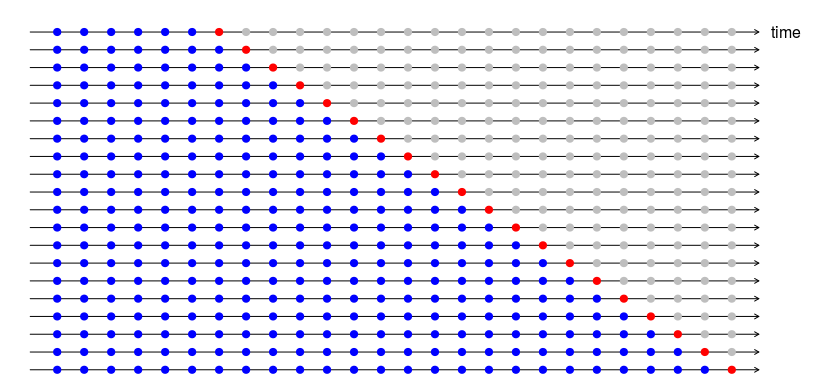

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.decomposition import TruncatedSVD
import xgboost as xgb
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings


### 关于时间序列数据处理的一些思考

In [17]:
# 没有人是先知
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, ？？？random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y_shift_one, test_size=0.2, shuffle=False)


# 高级的方法：Time Series Cross Validation: 
# tscv = TimeSeriesSplit(n_splits=5)
# for train_index, test_index in tscv.split(y):
    # y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # arima_model = ARIMA(y_train, order=(5,1,0))
    # arima_model_fit = arima_model.fit()
    # y_pred_arima = arima_model_fit.forecast(steps=len(y_test))
    # rmse_arima = np.sqrt(mean_squared_error(y_test, y_pred_arima))
    # rmse_arima_scores.append(rmse_arima)
    # average_rmse_arima = np.mean(rmse_arima_scores)


### 线性回归模型

In [18]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

win_ratio_lr = np.mean(np.sign(y_pred_lr) == np.sign(y_test.values))

print('Linear Regression RMSE: ', rmse_lr)
print('Linear Regression Win Ratio: ', win_ratio_lr)

Linear Regression RMSE:  0.021406059046177664
Linear Regression Win Ratio:  0.6279527559055118


In [19]:
# 随机森林
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [20]:
y_rf_pred = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_rf_pred))
win_ratio_rf = np.mean(np.sign(y_rf_pred) == np.sign(y_test.values))
print('Random Forest RMSE: ', rmse_rf)
print('Random Forest Win Ratio: ', win_ratio_rf)

Random Forest RMSE:  0.02238301738517434
Random Forest Win Ratio:  0.6225393700787402


<Figure size 1000x600 with 0 Axes>

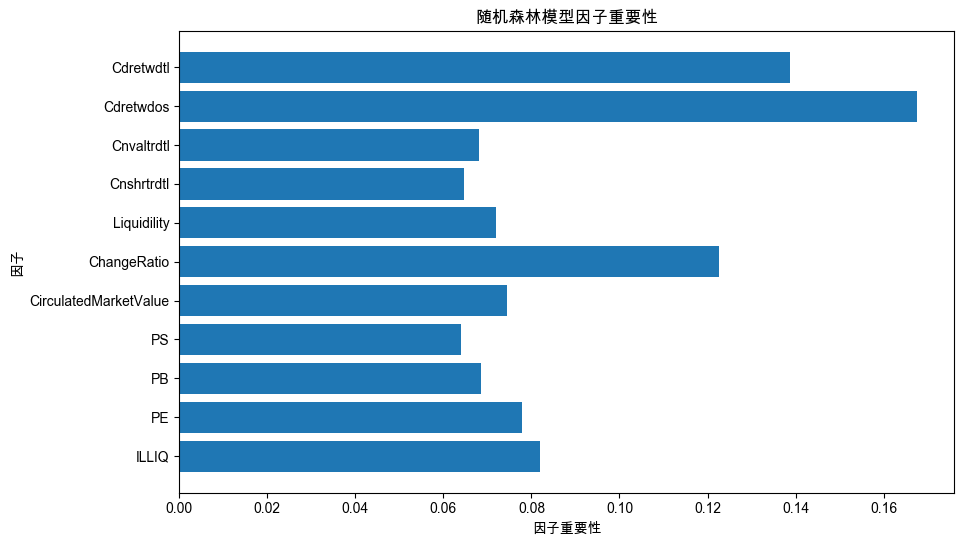

In [21]:
plt.figure(figsize=(10, 6))
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

feature_importances = rf_model.feature_importances_

# Plotting feature importances for visualization
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('因子重要性')
plt.ylabel('因子')
plt.title('随机森林模型因子重要性')
plt.show()

In [22]:
parameters = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}

rf_grid = GridSearchCV(rf_model, parameters, cv=3)
rf_grid.fit(X_train, y_train.values.ravel())


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [23]:
y_rf_grid_pred = rf_grid.predict(X_test)

In [24]:
# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(rf_grid.best_params_))
print("Best score is {}".format(rf_grid.best_score_))
print("Random Forest GRID RMSE: ", np.sqrt(mean_squared_error(y_test, rf_grid.predict(X_test))))
print("Random Forest GRID Win Ratio: ", np.mean(np.sign(rf_grid.predict(X_test)) == np.sign(y_test.values)))

Tuned Random Forest Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best score is 0.1287457700292672
Random Forest GRID RMSE:  0.02175479197935445
Random Forest GRID Win Ratio:  0.6205708661417323


it is actually getting worse

In [25]:
import pickle
filename = 'rf_grid_search_best_estimator_.sav'
pickle.dump(rf_grid.best_estimator_, open(filename, 'wb'))

In [26]:
# XGBoost
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train.values.ravel())
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
win_ratio_xgb = np.mean(np.sign(y_pred_xgb) == np.sign(y_test.values))

In [27]:


print("Linear Regression - RMSE:", rmse_lr, "Win Ratio:", win_ratio_lr)
print("Random Forest - RMSE:", rmse_rf, "Win Ratio:", win_ratio_rf)
print("XGBoost - RMSE:", rmse_xgb, "Win Ratio:", win_ratio_xgb)


Linear Regression - RMSE: 0.021406059046177664 Win Ratio: 0.6279527559055118
Random Forest - RMSE: 0.02238301738517434 Win Ratio: 0.6225393700787402
XGBoost - RMSE: 0.023567320098239405 Win Ratio: 0.6033464566929134


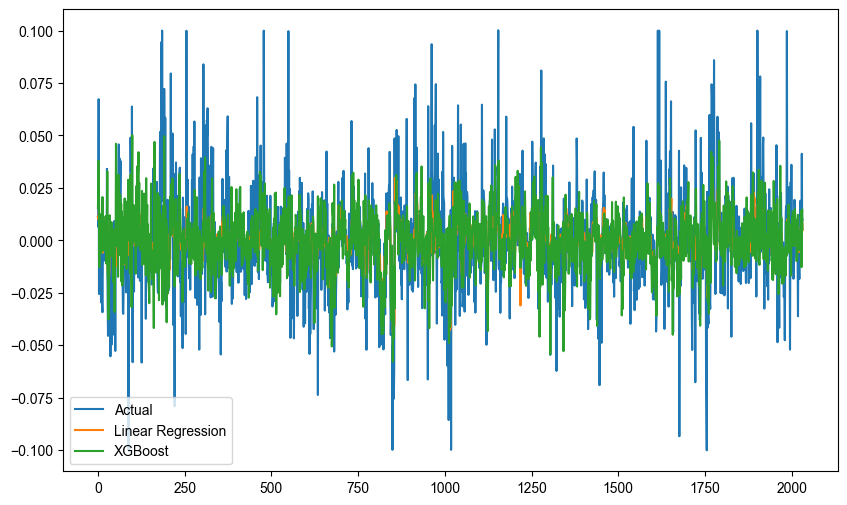

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lr, label='Linear Regression')
plt.plot(y_pred_xgb, label='XGBoost')
# plt.plot(y_rf_grid_pred, label='Random Forest')
plt.legend()
plt.show()


## 下一步？

### 应用：只要胜率大于50%，就可以赚钱....吗？
### 炼丹？

思考做一个T+1的预测

数据

解释性

包装！！！！！